# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | bikenibeu village
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | nichinan
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | san antonio de pale
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | kittila
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | jinchang
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | callao
Processing Record 21 of Set 1 | avarua
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

NameError: name 'city_data' is not defined

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.79,81,10,10.61,TF,1722713302
1,luderitz,-26.6481,15.1594,12.68,94,14,4.86,NA,1722713303
2,adamstown,-25.0660,-130.1015,20.83,72,19,6.30,PN,1722713304
3,bethel,41.3712,-73.4140,32.79,65,75,2.06,US,1722713087
4,bikenibeu village,1.3673,173.1241,27.98,83,20,2.57,KI,1722713306


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.79,81,10,10.61,TF,1722713302
1,luderitz,-26.6481,15.1594,12.68,94,14,4.86,NaN,1722713303
2,adamstown,-25.0660,-130.1015,20.83,72,19,6.30,PN,1722713304
3,bethel,41.3712,-73.4140,32.79,65,75,2.06,US,1722713087
4,bikenibeu village,1.3673,173.1241,27.98,83,20,2.57,KI,1722713306


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [1]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

NameError: name 'city_data_df' is not defined

#### Latitude Vs. Humidity

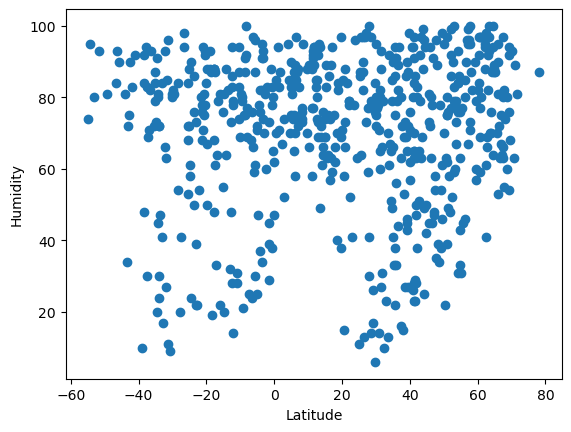

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

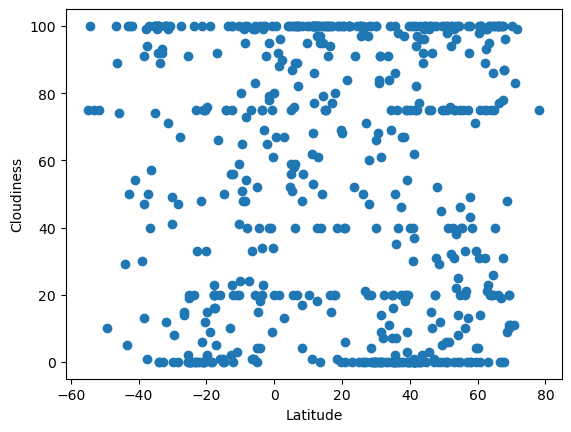

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

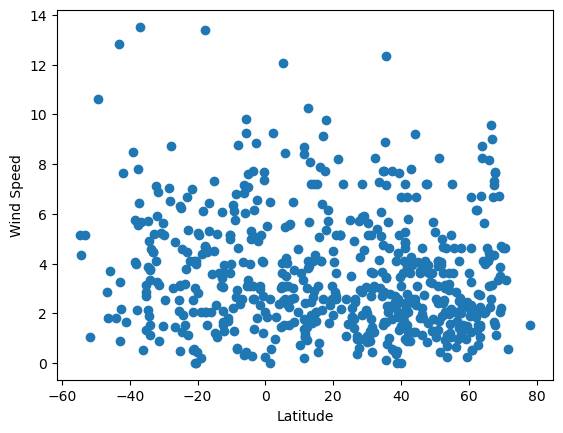

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def regress_func(city_data_df, x_col, y_col):
   
    # Use scipy.stats lingress
    (slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df[x_col], city_data_df[y_col])

    # Get linear regression values
    linreg_values = city_data_df[x_col] * slope + intercept

    # Convert linreg_values to NumPy array (XLA helped with this code)
    linreg_values = linreg_values
    
    # Plotting the results
    plt.scatter(city_data_df[x_col], city_data_df[y_col])
    plt.plot(city_data_df[x_col], linreg_values, color='red')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Return the following:
    return slope, intercept, rvalue, pvalue, stderr, linreg_values



In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bethel,41.3712,-73.4140,32.79,65,75,2.06,US,1722713087
4,bikenibeu village,1.3673,173.1241,27.98,83,20,2.57,KI,1722713306
7,nichinan,31.6000,131.3667,28.82,93,61,0.42,JP,1722713309
8,isafjordur,66.0755,-23.1240,7.97,95,100,4.41,IS,1722713312
11,kittila,67.6647,24.8936,19.08,55,0,1.54,FI,1722713315


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.79,81,10,10.61,TF,1722713302
1,luderitz,-26.6481,15.1594,12.68,94,14,4.86,NaN,1722713303
2,adamstown,-25.0660,-130.1015,20.83,72,19,6.30,PN,1722713304
5,edinburgh of the seven seas,-37.0676,-12.3116,11.66,71,100,13.52,SH,1722713307
6,waitangi,-43.9535,-176.5597,8.23,81,29,1.79,NZ,1722713279


###  Temperature vs. Latitude Linear Regression Plot

(-0.24457961056189173,
 32.182460898608454,
 -0.6426405943108016,
 2.5379787615732676e-48,
 0.014561422110002371,
 City_ID
 3      22.063909
 4      31.848047
 7      24.453745
 8      16.021741
 11     15.633055
          ...    
 583    29.369795
 588    15.844201
 589    16.702797
 590    29.194505
 591    28.415935
 Name: Lat, Length: 403, dtype: float64)

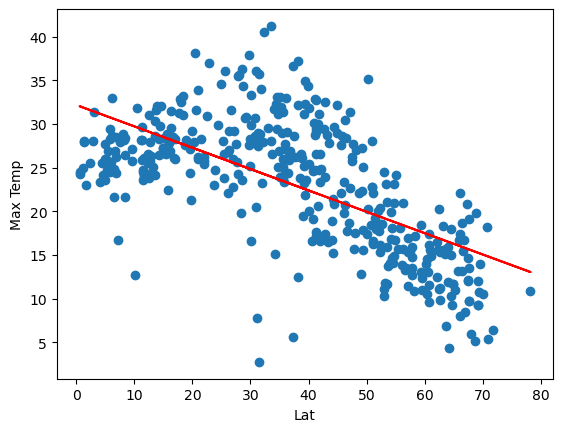

In [65]:
# Linear regression on Northern Hemisphere
regress_func(northern_hemi_df, 'Lat', 'Max Temp')

#### Latitude Vs. Cloudiness

(0.4791285216138513,
 29.202901388095015,
 0.7683981457895346,
 4.269601566760592e-38,
 0.02918138862246396,
 City_ID
 0       5.557909
 1      16.435037
 2      17.193066
 5      11.442757
 6       8.143526
          ...    
 578    11.257286
 584    20.630382
 585    28.859510
 586    20.674414
 587    16.490041
 Name: Lat, Length: 189, dtype: float64)

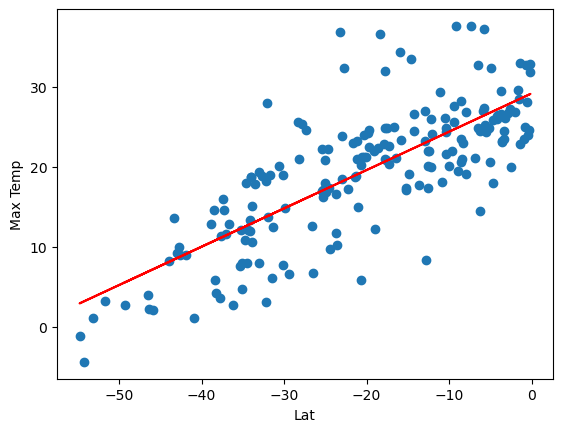

In [66]:
# Linear regression on Southern Hemisphere
regress_func(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** The northern hemisphere plot showed a clear negative correlation between lattitude and temperature, whereas the southern hemisphere plot showed a positive correlation. As both approach the equator the temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

(-0.007442663848164386,
 71.73747680282511,
 -0.006920737526848556,
 0.8898429418576184,
 0.053702368266918724,
 City_ID
 3      71.429565
 4      71.727300
 7      71.502289
 8      71.245699
 11     71.233871
          ...    
 583    71.651886
 588    71.240296
 589    71.266424
 590    71.646552
 591    71.622860
 Name: Lat, Length: 403, dtype: float64)

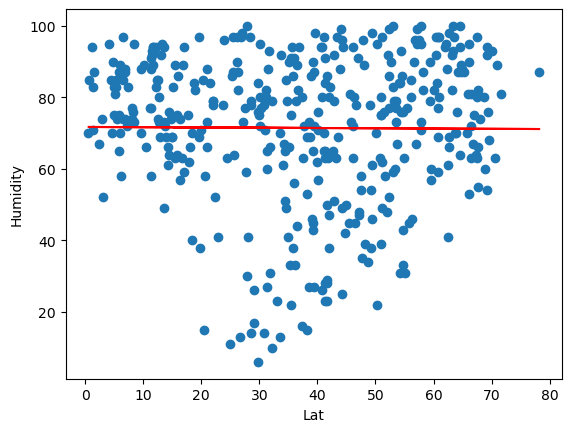

In [67]:
# Northern Hemisphere
regress_func(northern_hemi_df, 'Lat', 'Humidity')

(-0.10834004466104677,
 65.67645144435905,
 -0.06244713672098021,
 0.39330203787212237,
 0.12662143301216247,
 City_ID
 0      71.023033
 1      68.563508
 2      68.392103
 5      69.692357
 6      70.438376
          ...    
 578    69.734295
 584    67.614861
 585    65.754099
 586    67.604904
 587    68.551070
 Name: Lat, Length: 189, dtype: float64)

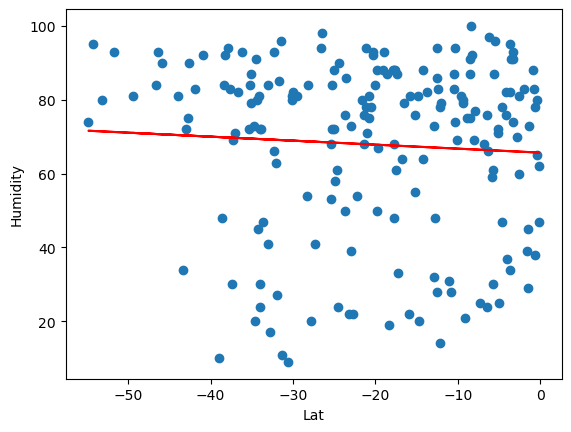

In [68]:
# Southern Hemisphere
regress_func(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** The linear regression for these humidity and lattitude plots are not very informative. There is no clear correlation between these two factors.

### Cloudiness vs. Latitude Linear Regression Plot

(-0.29971860348045365,
 66.11776441352549,
 -0.14612217900403263,
 0.003281416250904996,
 0.10133015317381806,
 City_ID
 3      53.718046
 4      65.707959
 7      56.646657
 8      46.313708
 11     45.837395
          ...    
 583    62.671000
 588    46.096142
 589    47.148304
 590    62.456192
 591    61.502098
 Name: Lat, Length: 403, dtype: float64)

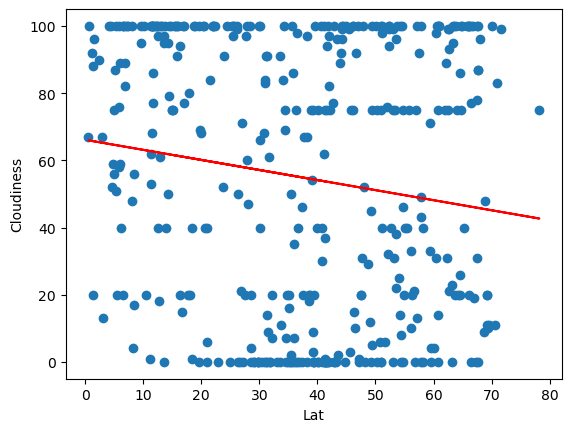

In [70]:
# Northern Hemisphere
regress_func(northern_hemi_df, 'Lat', 'Cloudiness')

(-0.3712088458550628,
 42.80266525581567,
 -0.13099568664593422,
 0.07238389299897177,
 0.20543855811045858,
 City_ID
 0      61.121822
 1      52.694676
 2      52.107386
 5      56.562486
 6      59.118593
          ...    
 578    56.706181
 584    49.444297
 585    43.068711
 586    49.410183
 587    52.652061
 Name: Lat, Length: 189, dtype: float64)

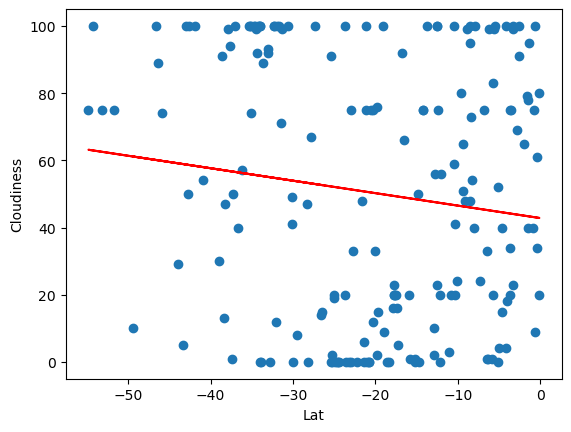

In [69]:
# Southern Hemisphere
regress_func(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** The linear regression for these cloudiness and lattitude plots are not very informative. There is no clear correlation between these two factors.

### Wind Speed vs. Latitude Linear Regression Plot

(-0.005415726695582401,
 3.587284649847438,
 -0.046487560404176946,
 0.35193850205151256,
 0.0058113631386753056,
 City_ID
 3      3.363230
 4      3.579880
 7      3.416148
 8      3.229438
 11     3.220831
          ...   
 583    3.525004
 588    3.225507
 589    3.244518
 590    3.521122
 591    3.503882
 Name: Lat, Length: 403, dtype: float64)

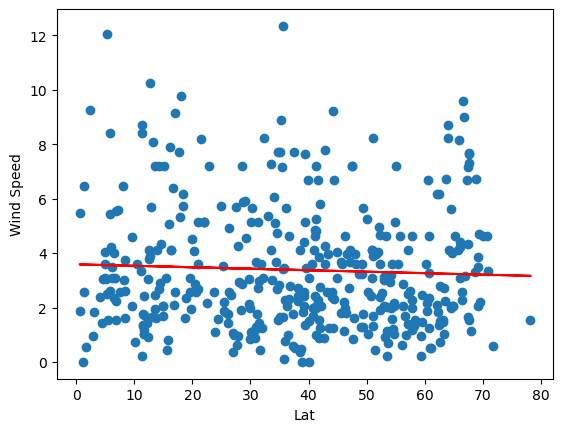

In [71]:
# Northern Hemisphere
regress_func(northern_hemi_df, 'Lat', 'Wind Speed')

(-0.008043566830247513,
 3.8297840540375363,
 -0.043430176904889865,
 0.5529232735030962,
 0.013530888249903568,
 City_ID
 0      4.226734
 1      4.044130
 2      4.031404
 5      4.127940
 6      4.183327
          ...   
 578    4.131053
 584    3.973699
 585    3.835549
 586    3.972960
 587    4.043206
 Name: Lat, Length: 189, dtype: float64)

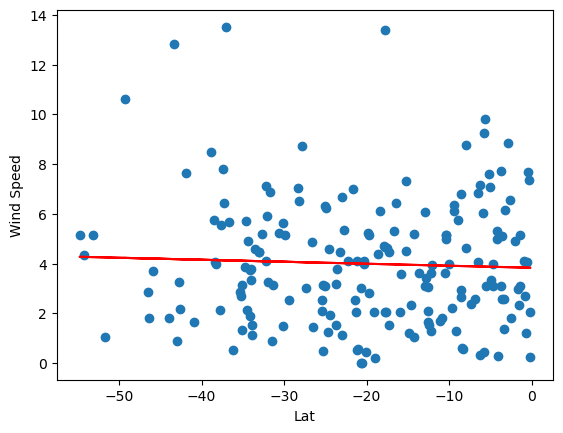

In [72]:
# Southern Hemisphere
regress_func(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** The linear regression for these wind speed and lattitude plots are not very informative. There is no clear correlation between these two factors. The only clear correlations here are between lattitude and temperature. Cloudiness, humidity and wind speed have relatively flat linear relationships to lattitude, no clear correlation.